In [1]:
#worked on MNISt dataset.....where images are of 28x28

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
def plot_input_image(i):
    plt.imshow(X_train[i],cmap='binary')
    plt.title(y_train[i])
    plt.axis('off')
    plt.show()

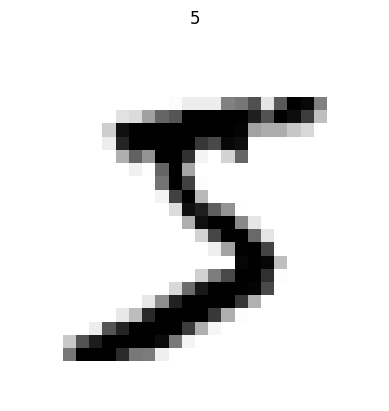

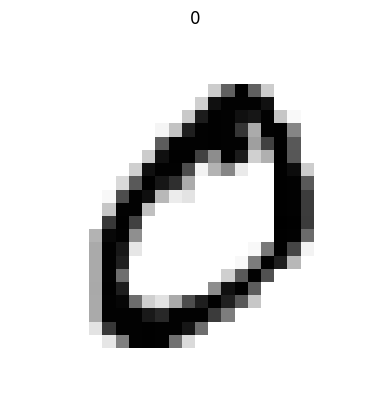

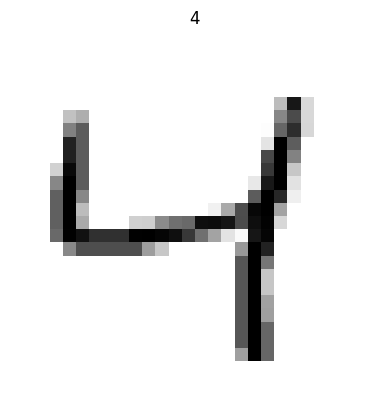

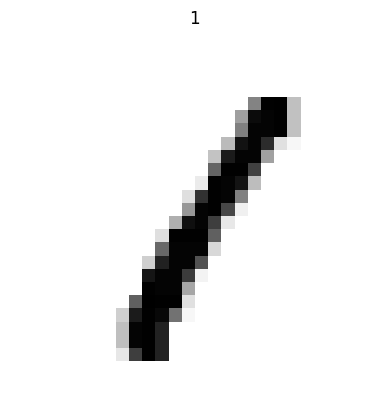

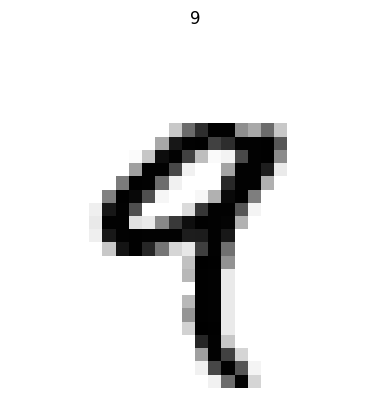

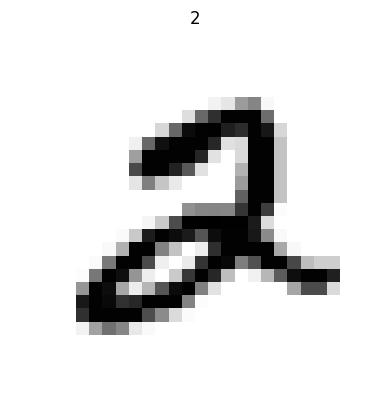

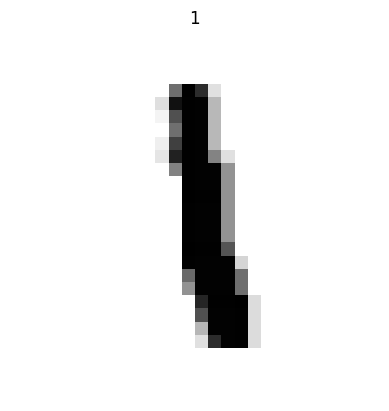

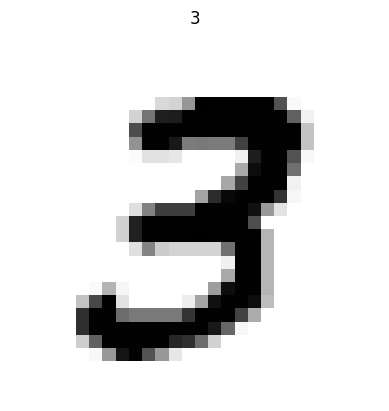

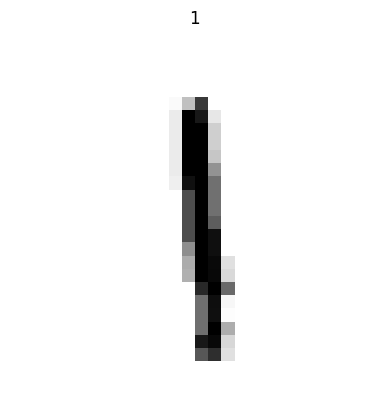

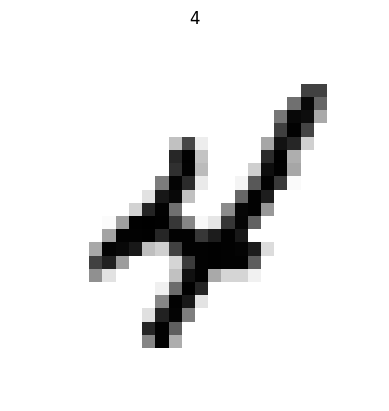

In [5]:
for i in range(10):
    plot_input_image(i)

In [6]:
#preprocessing
X_train = X_train/255 #to normalize in range[0,1]
X_test = X_test/255

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [9]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [12]:
his=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 17s 10ms/step - loss: 0.2837 - accuracy: 0.9177 - val_loss: 0.1471 - val_accuracy: 0.9544
Epoch 2/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1202 - accuracy: 0.9635 - val_loss: 0.1086 - val_accuracy: 0.9665
Epoch 3/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0831 - accuracy: 0.9745 - val_loss: 0.0970 - val_accuracy: 0.9698
Epoch 4/25
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0634 - accuracy: 0.9800 - val_loss: 0.0993 - val_accuracy: 0.9705
Epoch 5/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0502 - accuracy: 0.9836 - val_loss: 0.0959 - val_accuracy: 0.9732
Epoch 6/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.1047 - val_accuracy: 0.9718
Epoch 7/25
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0304 - accuracy: 0.9895 - val_loss: 0.1014 - val_a

In [13]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [14]:
y_pred = y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9765

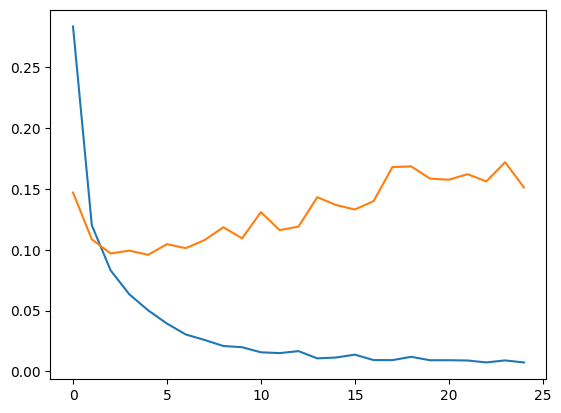

In [18]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])

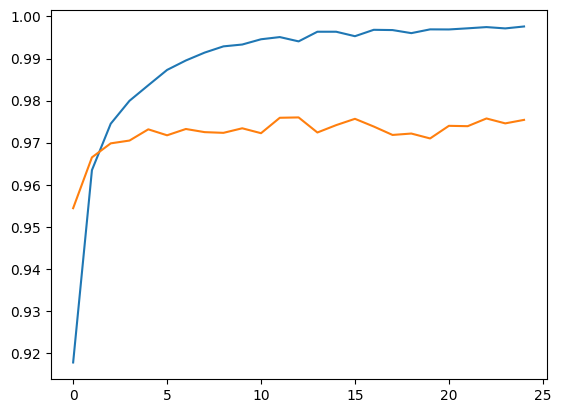

In [19]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])

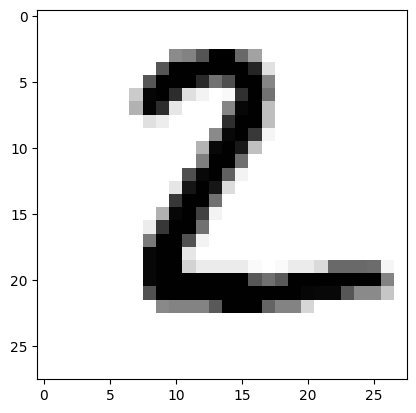

In [20]:
plt.imshow(X_test[1],cmap='binary')

In [21]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 55ms/step


array([2], dtype=int64)